In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

# Mine
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential
from wilson_cowan_2d.kernels.kernels import make_K_2_populations
from wilson_cowan_2d.systems.nulclines import calc_cross_points, calc_nulclines_crosspoints
%load_ext autoreload
%autoreload 2

[[0.         0.005      0.083      0.424     ]
 [0.00394604 0.00394725 0.00396604 0.20470882]]


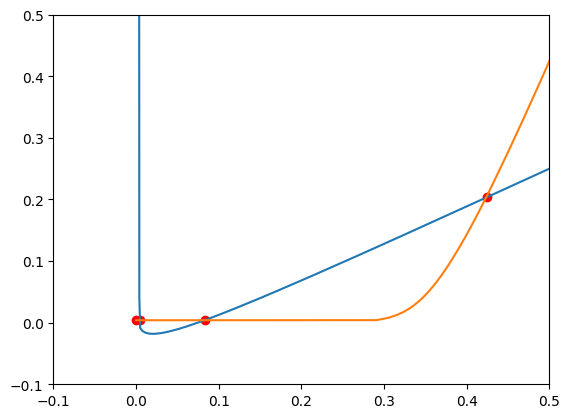

In [331]:
τe = 1
τi = 0.1 * τe
σe = 1
σi = 1.25* σe

param = wck.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9)
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
u[0:2**0] = 1
v = v_str*np.ones(param.size).reshape((param.size, 1))
# v[0:2**0] = 1
#  inp = (u3, v3, u3, 0)

inp = (u, v)

In [332]:
u_mirror = np.concatenate([np.flip(u).ravel()[:param.size-1],
                                   u.ravel(), np.flip(u).ravel()[1:param.size]])


The solver successfully reached the end of the integration interval.


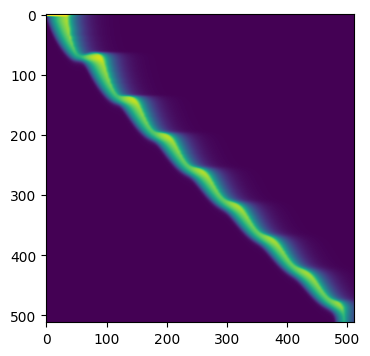

In [552]:
τe = 1
τi = 2 * τe
σe = 1
σi = 1.35* σe
param = wck.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9)
u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
u[0:2**2] = 1
v = v_str*np.ones(param.size).reshape((param.size, 1))
inp = (u, v)
end = 32
step = end/(param.size)

trv_wav = wck.WCDecExpTravelNonLocal1D(inp, param, np.array([σe, σi]))
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u, vmin=0, vmax=1)


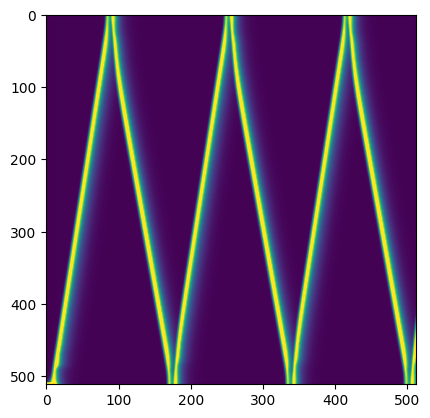

In [512]:
fig = plt.figure()
plt.imshow(np.flip(res.u[:,:param.size], axis=0), aspect='equal', vmin=0, vmax=0.5)# plt.colorbar()

In [339]:
res.u[0]

array([1.        , 0.07062483, 0.11166858, 0.20032151, 0.33600314,
       0.51005039, 0.68765635, 0.68393661, 0.48273765, 0.19100774,
       0.0852387 , 0.13620288, 0.21743692, 0.35552008, 0.52809873,
       0.71211003, 0.67212218, 0.46632276, 0.17482413, 0.08757089,
       0.14035571, 0.2286247 , 0.37605271, 0.54299927, 0.72968778,
       0.65732806, 0.43470848, 0.14533728, 0.09264968, 0.1490682 ,
       0.24143008, 0.39203257, 0.56860039, 0.76206425, 0.66113824,
       0.41613349, 0.09688333, 0.09632826, 0.15824202, 0.23924678,
       0.38350719, 0.47946687, 0.58551423, 0.33132742, 0.03030153,
       0.0571177 , 0.30009153, 0.28617775, 0.20179837, 0.25271234,
       0.51826631, 0.26922244, 0.15612456, 0.87548903, 0.35702627,
       0.13509542, 0.06198048, 0.2859565 , 0.34692546, 0.44224424,
       0.94443204, 0.34549906, 0.07284495, 0.07083545, 0.15791371,
       0.61368548, 0.59129031, 0.15034872, 0.43707569, 0.02941393,
       0.71659043, 0.61423002, 0.53668495, 0.9480434 , 0.75674

In [275]:
size = 2**8
abss = np.abs(np.linspace(-2*size, 2*size, 2*size-1))
# DEe = decreasing_exponential(abss, σe)


In [135]:
np.log2(abss.size+1)

9.0